In [104]:
import pandas as pd

df = pd.read_csv("/Users/anvithaenaganti/Desktop/bootcamp_macaw_04_26/.anvitha/Social_Network_Ads.csv")

df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [105]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [106]:
df["Purchased"].value_counts()*100/len(df)

Purchased
0    64.25
1    35.75
Name: count, dtype: float64

In [107]:
#scale age and estimated salary
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[["Age", "EstimatedSalary"]] = scaler.fit_transform(df[["Age", "EstimatedSalary"]])
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,-1.781797,-1.490046,0
1,15810944,Male,-0.253587,-1.460681,0
2,15668575,Female,-1.113206,-0.785290,0
3,15603246,Female,-1.017692,-0.374182,0
4,15804002,Male,-1.781797,0.183751,0


In [108]:
#change the gender to numeric values
df["Gender"] = df["Gender"].map({"Male":0, "Female":1})
df.head(5) 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,-1.781797,-1.490046,0
1,15810944,0,-0.253587,-1.460681,0
2,15668575,1,-1.113206,-0.785290,0
3,15603246,1,-1.017692,-0.374182,0
4,15804002,0,-1.781797,0.183751,0


In [109]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,4.000000e+02,4.000000e+02,400.000000
mean,1.569154e+07,0.510000,-7.105427e-17,-1.776357e-17,0.357500
std,7.165832e+04,0.500526,1.001252e+00,1.001252e+00,0.479864
min,1.556669e+07,0.000000,-1.877311e+00,-1.607506e+00,0.000000
25%,1.562676e+07,0.000000,-7.550313e-01,-7.852897e-01,0.000000
50%,1.569434e+07,1.000000,-6.256110e-02,7.561451e-03,0.000000
75%,1.575036e+07,1.000000,7.970571e-01,5.361289e-01,1.000000
max,1.581524e+07,1.000000,2.134241e+00,2.356750e+00,1.000000


In [110]:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    df[["Age", "EstimatedSalary"]], df["Purchased"], test_size=0.2, random_state=42
)   

In [111]:
import numpy as np
def sigmoid(X):
    return 1/(1+np.exp(-X))

def predict_proba(X,w,b):
    z=np.dot(X,w)+ b
    return sigmoid(z)

def compute_loss(y, p):
    eps = 1e-9
    return -np.mean(y*np.log(p+eps) + (1-y)*np.log(1-p+eps))

def gradient(X,y,p):
    n=len(y)
    dw=np.dot(X.T, (p-y))/n
    db=np.sum(p-y)/n
    return dw, db

def train(X, y, lr=0.1, epochs=1000):
    n_features = X.shape[1]
    w = np.zeros(n_features)
    b = 0

    for i in range(epochs):
        p = predict_proba(X, w, b)
        loss = compute_loss(y, p)

        dw, db = gradient(X, y, p)

        w -= lr * dw
        b -= lr * db

        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {loss:.4f}")

    return w, b

def predict(X, w, b, threshold=0.5):
    probs = predict_proba(X, w, b)
    y_pred = (probs >= threshold).astype(int)
    print(y_pred)
    return y_pred
print("Logistic Regression from Scratch")


Logistic Regression from Scratch


In [112]:
#test the function with some random data
w, b = train(X_train, y_train, lr=0.1, epochs=1000)
print("Weights:", w)
print("Bias:", b)
y_pred = predict_proba(X_test, w, b)
print("Predictions:", y_pred>0.5)   

Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.4072
Epoch 200, Loss: 0.3835
Epoch 300, Loss: 0.3771
Epoch 400, Loss: 0.3747
Epoch 500, Loss: 0.3737
Epoch 600, Loss: 0.3732
Epoch 700, Loss: 0.3730
Epoch 800, Loss: 0.3729
Epoch 900, Loss: 0.3729
Weights: [2.1427655  1.19193569]
Bias: -1.0889187830829845
Predictions: [False  True False  True False False  True False False False False  True
 False False False False  True  True False  True False False False  True
 False  True  True False  True False False False  True False  True False
 False False False False False False False False False  True False False
  True False False  True False False False False  True False False False
 False False  True False False False  True  True False False  True False
 False False False False  True  True False False]


In [113]:
#precision recall curve
from sklearn.metrics import precision_recall_curve, auc
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
lr_auc = auc(recall, precision)
print ("precision:", precision)
print ("recall:", recall)
print ("threshold:", threshold)
print("AUC Score:", lr_auc)

precision: [0.35       0.35443038 0.35897436 0.36363636 0.36842105 0.37333333
 0.37837838 0.38356164 0.38888889 0.3943662  0.4        0.4057971
 0.41176471 0.41791045 0.42424242 0.43076923 0.4375     0.44444444
 0.4516129  0.45901639 0.46666667 0.47457627 0.48275862 0.49122807
 0.5        0.50909091 0.51851852 0.52830189 0.53846154 0.54901961
 0.56       0.57142857 0.58333333 0.59574468 0.60869565 0.62222222
 0.63636364 0.65116279 0.66666667 0.68292683 0.7        0.71794872
 0.73684211 0.75675676 0.77777778 0.8        0.79411765 0.78787879
 0.78125    0.80645161 0.8        0.82758621 0.82142857 0.85185185
 0.84615385 0.88       0.91666667 0.91304348 0.90909091 0.9047619
 0.95       0.94736842 0.94444444 0.94117647 0.9375     1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]
recall: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.      

In [114]:
#auc score 
print("AUC Score:", lr_auc)

AUC Score: 0.941390910310929


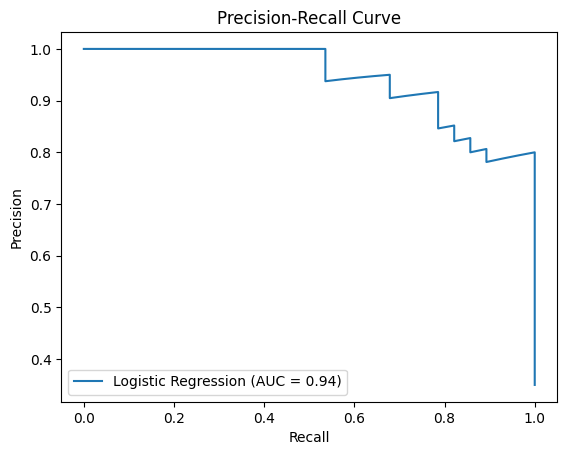

In [115]:
#auc in grapgh 
import matplotlib.pyplot as plt
plt.plot(recall, precision, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()  